In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO

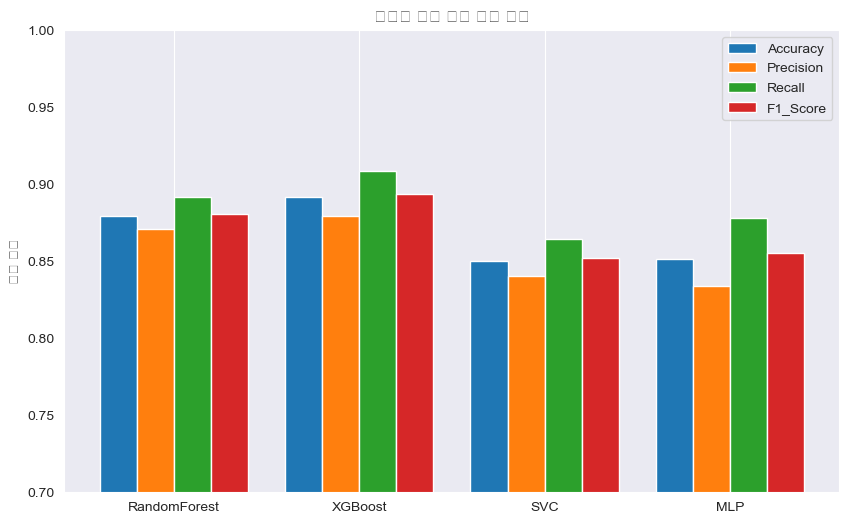

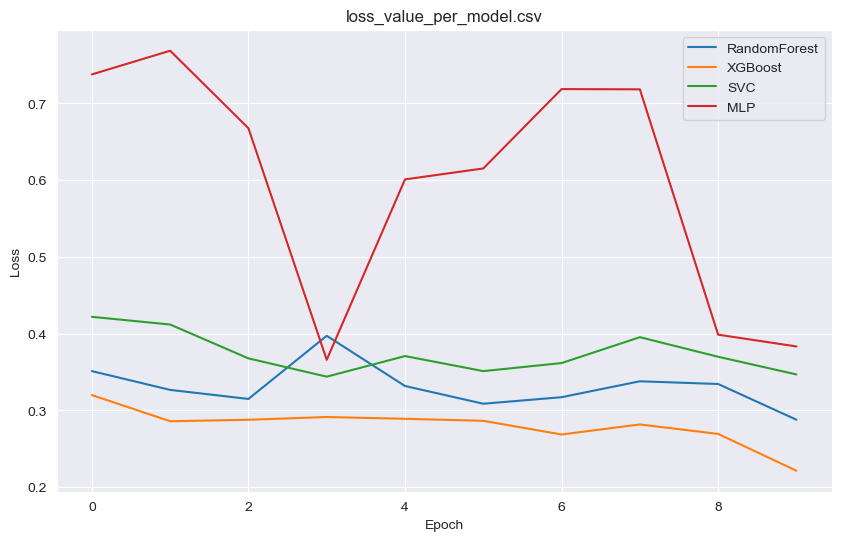

In [12]:
# CSV 파일 경로
files = {
    "RandomForest": "data/RandomForest_metrics.csv",
    "XGBoost": "data/XGBoost_metrics.csv",
    "SVC": "data/SVC_metrics.csv",
    "MLP": "data/MLP_metrics.csv"
}

# 데이터프레임 로드 및 각 지표 평균 계산
metrics_avg = {}
for model, path in files.items():
    df = pd.read_csv(path)
    metrics_avg[model] = df.mean()

# 데이터프레임 생성 (모델별, 평가 지표별 평균)
avg_df = pd.DataFrame(metrics_avg).T

# 모델별로 그룹화된 바 차트 그리기 (x축: 모델, 색상별: metric)
labels = avg_df.index.tolist()  # 모델명 리스트
metrics = avg_df.columns.tolist()  # ['Accuracy', 'Precision', 'Recall', 'F1_Score']

x = np.arange(len(labels))  # 모델 개수
width = 0.2  # 막대 너비

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, avg_df[metric], width, label=metric)

ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(labels)
ax.set_ylim(0.7, 1.0)
ax.set_title('모델별 평가 지표 평균 비교')
ax.set_ylabel('평균 점수')
ax.legend()
ax.grid(axis='y')

plt.show()

df_loss = pd.read_csv('data/loss_per_model.csv', index_col='epoch')

plt.figure(figsize=(10, 6))

for model in df_loss.columns:
    plt.plot(df_loss.index, df_loss[model], label=model)

plt.title('loss_value_per_model.csv')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


### RandomForest 최적 하이퍼파라미터 최빈값

| Parameter           | Value       |
|---------------------|-------------|
| max_depth           | 15          |
| min_samples_leaf    | 1           |
| min_samples_split   | 2           |
| n_estimators        | 200         |

### XGBoost 최적 하이퍼파라미터 최빈값

| Parameter           | Value       |
|---------------------|-------------|
| colsample_bytree    | 0.8         |
| learning_rate       | 0.1         |
| max_depth           | 7           |
| n_estimators        | 200         |
| subsample           | 0.8         |

### SVC 최적 하이퍼파라미터 최빈값

| Parameter           | Value       |
|---------------------|-------------|
| C                   | 10          |
| kernel              | 'rbf'       |
| gamma               | 'scale'     |
| shrinking           | True        |
| class_weight        | None        |

### MLP 최적 하이퍼파라미터 최빈값

| Parameter           | Value         |
|---------------------|---------------|
| activation          | 'relu'        |
| alpha               | 0.01          |
| hidden_layer_sizes  | (100,)        |
| solver              | 'adam'        |


In [4]:
import pandas as pd

RandomForest_accuracy = [0.9089, 0.8745, 0.8684, 0.8866, 0.8664, 0.8765, 0.8866, 0.8806, 0.8684, 0.8887, 0.8968, 0.8846, 0.8947, 0.8846, 0.8603, 0.8846, 0.8846, 0.8907, 0.8704, 0.8704, 0.8603, 0.8785, 0.8725, 0.8684, 0.8745, 0.8846, 0.8785, 0.8583, 0.8725, 0.9089]
RandomForest_precision = [0.9174, 0.8627, 0.8611, 0.8775, 0.8606, 0.8577, 0.8687, 0.876, 0.8583, 0.884, 0.8984, 0.874, 0.8916, 0.874, 0.845, 0.8626, 0.877, 0.8755, 0.8617, 0.8675, 0.8618, 0.8502, 0.8594, 0.8555, 0.8491, 0.874, 0.8755, 0.8554, 0.877, 0.9106]
RandomForest_recall = [0.8988, 0.8907, 0.8785, 0.8988, 0.8745, 0.9028, 0.9109, 0.8866, 0.8826, 0.8947, 0.8947, 0.8988, 0.8988, 0.8988, 0.8826, 0.915, 0.8947, 0.9109, 0.8826, 0.8745, 0.8583, 0.919, 0.8907, 0.8866, 0.9109, 0.8988, 0.8826, 0.8623, 0.8664, 0.9069]
RandomForest_f1 = [0.908, 0.8765, 0.8697, 0.888, 0.8675, 0.8797, 0.8893, 0.8813, 0.8703, 0.8893, 0.8966, 0.8862, 0.8952, 0.8862, 0.8634, 0.888, 0.8858, 0.8929, 0.872, 0.871, 0.86, 0.8833, 0.8748, 0.8708, 0.8789, 0.8862, 0.879, 0.8589, 0.8717, 0.9087]

XGBoost_accuracy = [0.9109, 0.8988, 0.8765, 0.8866, 0.8745, 0.8988, 0.917, 0.8887, 0.8745, 0.8866, 0.8968, 0.9069, 0.9069, 0.8947, 0.8806, 0.9008, 0.8947, 0.9069, 0.8785, 0.8866, 0.8846, 0.8866, 0.8846, 0.8927, 0.8826, 0.8907, 0.8765, 0.8887, 0.8866, 0.913]
XGBoost_precision = [0.9109, 0.8893, 0.8577, 0.8687, 0.8544, 0.8745, 0.9023, 0.884, 0.8656, 0.8687, 0.8828, 0.8972, 0.9069, 0.8764, 0.8588, 0.8779, 0.8854, 0.8941, 0.8725, 0.8775, 0.8992, 0.8687, 0.8711, 0.8819, 0.8462, 0.8669, 0.8605, 0.8902, 0.8659, 0.918]
XGBoost_recall = [0.9109, 0.9109, 0.9028, 0.9109, 0.9028, 0.9312, 0.9352, 0.8947, 0.8866, 0.9109, 0.915, 0.919, 0.9069, 0.919, 0.9109, 0.9312, 0.9069, 0.9231, 0.8866, 0.8988, 0.8664, 0.9109, 0.9028, 0.9069, 0.9352, 0.9231, 0.8988, 0.8866, 0.915, 0.9069]
XGBoost_f1 = [0.9109, 0.9, 0.8797, 0.8893, 0.878, 0.902, 0.9185, 0.8893, 0.876, 0.8893, 0.8986, 0.908, 0.9069, 0.8972, 0.8841, 0.9037, 0.896, 0.9084, 0.8795, 0.888, 0.8825, 0.8893, 0.8867, 0.8942, 0.8885, 0.8941, 0.8792, 0.8884, 0.8898, 0.9124]

SVC_accuracy = [0.8725, 0.8543, 0.83, 0.8725, 0.8441, 0.8563, 0.8623, 0.8543, 0.8543, 0.8482, 0.8704, 0.8401, 0.8563, 0.8583, 0.8543, 0.8583, 0.8583, 0.8623, 0.8441, 0.8482, 0.834, 0.834, 0.8482, 0.8583, 0.8421, 0.8421, 0.8219, 0.834, 0.8401, 0.8462]
SVC_precision = [0.8538, 0.8405, 0.8075, 0.8538, 0.84, 0.8385, 0.8482, 0.8378, 0.8486, 0.8525, 0.8533, 0.8307, 0.8492, 0.8554, 0.8327, 0.8583, 0.8642, 0.8538, 0.8346, 0.8468, 0.8452, 0.8161, 0.844, 0.8471, 0.8213, 0.8367, 0.7955, 0.8395, 0.836, 0.8353]
SVC_recall = [0.8988, 0.8745, 0.8664, 0.8988, 0.8502, 0.8826, 0.8826, 0.8785, 0.8623, 0.8421, 0.8947, 0.8543, 0.8664, 0.8623, 0.8866, 0.8583, 0.8502, 0.8745, 0.8583, 0.8502, 0.8178, 0.8623, 0.8543, 0.8745, 0.8745, 0.8502, 0.8664, 0.8259, 0.8462, 0.8623]
SVC_f1 = [0.8757, 0.8571, 0.8359, 0.8757, 0.8451, 0.86, 0.8651, 0.8577, 0.8554, 0.8473, 0.8735, 0.8423, 0.8577, 0.8589, 0.8588, 0.8583, 0.8571, 0.864, 0.8463, 0.8485, 0.8313, 0.8386, 0.8491, 0.8606, 0.8471, 0.8434, 0.8295, 0.8327, 0.841, 0.8486]

MLP_accuracy = [0.8623, 0.8563, 0.8138, 0.8846, 0.834, 0.8644, 0.8543, 0.8502, 0.8543, 0.8482, 0.8623, 0.8603, 0.8583, 0.8623, 0.8421, 0.8704, 0.8543, 0.8704, 0.8279, 0.8583, 0.832, 0.832, 0.832, 0.8826, 0.8219, 0.8644, 0.8239, 0.8462, 0.8583, 0.8563]
MLP_precision = [0.8429, 0.8548, 0.7925, 0.877, 0.809, 0.8462, 0.8229, 0.834, 0.8378, 0.8308, 0.8303, 0.8423, 0.8391, 0.8456, 0.8165, 0.8533, 0.8601, 0.8704, 0.8022, 0.8417, 0.8154, 0.813, 0.8254, 0.8649, 0.7809, 0.8659, 0.7837, 0.8434, 0.8498, 0.8359]
MLP_recall = [0.8907, 0.8583, 0.8502, 0.8947, 0.8745, 0.8907, 0.9028, 0.8745, 0.8785, 0.8745, 0.9109, 0.8866, 0.8866, 0.8866, 0.8826, 0.8947, 0.8462, 0.8704, 0.8704, 0.8826, 0.8583, 0.8623, 0.8421, 0.9069, 0.8947, 0.8623, 0.8947, 0.8502, 0.8704, 0.8866]
MLP_f1 = [0.8661, 0.8566, 0.8203, 0.8858, 0.8405, 0.8679, 0.861, 0.8538, 0.8577, 0.8521, 0.8687, 0.8639, 0.8622, 0.8656, 0.8482, 0.8735, 0.8531, 0.8704, 0.835, 0.8617, 0.8363, 0.8369, 0.8337, 0.8854, 0.834, 0.8641, 0.8355, 0.8468, 0.86, 0.8605]

df_rf = pd.DataFrame({
    "Accuracy": RandomForest_accuracy,
    "Precision": RandomForest_precision,
    "Recall": RandomForest_recall,
    "F1_Score": RandomForest_f1
})
df_rf.to_csv("RandomForest_metrics.csv", index=False)

# XGBoost DataFrame 생성 및 저장
df_xgb = pd.DataFrame({
    "Accuracy": XGBoost_accuracy,
    "Precision": XGBoost_precision,
    "Recall": XGBoost_recall,
    "F1_Score": XGBoost_f1
})
df_xgb.to_csv("XGBoost_metrics.csv", index=False)

# SVC DataFrame 생성 및 저장
df_svc = pd.DataFrame({
    "Accuracy": SVC_accuracy,
    "Precision": SVC_precision,
    "Recall": SVC_recall,
    "F1_Score": SVC_f1
})
df_svc.to_csv("SVC_metrics.csv", index=False)

# MLP DataFrame 생성 및 저장
df_mlp = pd.DataFrame({
    "Accuracy": MLP_accuracy,
    "Precision": MLP_precision,
    "Recall": MLP_recall,
    "F1_Score": MLP_f1
})
df_mlp.to_csv("MLP_metrics.csv", index=False)

print("모든 모델별 CSV 파일이 저장되었습니다.")


모든 모델별 CSV 파일이 저장되었습니다.


In [8]:
import pandas as pd

# 손실 함수 기록 데이터 (질문 내용 그대로 변수에 할당)
loss_dict = {
    'XGBoost': [
        [('RandomForest', 0.35117738673601606), ('XGBoost', 0.3199814883881552), ('SVC', 0.42193782760655774), ('MLP', 0.7378014238701748)],
        [('RandomForest', 0.3267114535782637), ('XGBoost', 0.28586802550685825), ('SVC', 0.411878767061512), ('MLP', 0.7686612019410649)],
        [('RandomForest', 0.31491560402064106), ('XGBoost', 0.2877793439870493), ('SVC', 0.36777422181825425), ('MLP', 0.6676167850302399)],
        [('RandomForest', 0.39721252137589247), ('XGBoost', 0.2913638242729389), ('SVC', 0.3439313714558658), ('MLP', 0.365877356664492)],
        [('RandomForest', 0.3317754064670294), ('XGBoost', 0.2890562454428238), ('SVC', 0.3707920853026601), ('MLP', 0.6010035561029983)],
        [('RandomForest', 0.30868287675955836), ('XGBoost', 0.28641868088720585), ('SVC', 0.35118236526727464), ('MLP', 0.6152534852043086)],
        [('RandomForest', 0.31719220032119894), ('XGBoost', 0.2685938459526679), ('SVC', 0.3616626706718701), ('MLP', 0.7186680954707155)],
        [('RandomForest', 0.33793750614115436), ('XGBoost', 0.28170883284815257), ('SVC', 0.39539134159707373), ('MLP', 0.7183549332160767)],
        [('RandomForest', 0.33439443870829616), ('XGBoost', 0.26935032536290976), ('SVC', 0.36987634440748224), ('MLP', 0.39866077359575763)],
        [('RandomForest', 0.28784423483590776), ('XGBoost', 0.22139183442494872), ('SVC', 0.3468422421217789), ('MLP', 0.383333731453815)]
    ]
}

# 모델 리스트
models = ['RandomForest', 'XGBoost', 'SVC', 'MLP']

# 각 모델별 손실 리스트 초기화
loss_data = {model: [] for model in models}

# 데이터 분리: loss_dict['XGBoost']는 각 epoch별 리스트, 각 리스트 안에 튜플(모델명, 손실값)
for epoch_losses in loss_dict['XGBoost']:
    for model_name, loss_value in epoch_losses:
        loss_data[model_name].append(loss_value)

# DataFrame 생성
df_loss = pd.DataFrame(loss_data)

# CSV 파일로 저장
df_loss.to_csv('loss_per_model.csv', index_label='epoch')

print("손실 함수 기록이 'loss_values_per_model.csv' 파일로 저장되었습니다.")


손실 함수 기록이 'loss_values_per_model.csv' 파일로 저장되었습니다.
